###  A review of the Vancouver's air bnb data-UDacity-CrispDM Project

#### BUSINESS UNDERSTANDING

The data sets obtained for the analysis of  vancouver air bnb market contain property listing data set, calendar data set, and reviews data set. All these data set gives us insights about the Vancouver air bnb market. We will use these data set in tandem to find corrleations and answer the following questions.  

Pricing correlation:
* How does price correlates with seasons of year?
* How the type of property impacts the listing price in Vancouver??
* Dependance of listing price on the neighbourhoods in Vancouver?



Analysis of Reviews:
- Understanding how reviews impact the occupancy rate
- Get a correlation of the reviews with the neighbourhoods in vancouver
- Can we explore some of the worst reviews for additional insights?


Influence of parameters on availability:
- Cancellation policy
- Room type
- Number of guests
- Guests picture




#### DATA UNDERSTANDING

we will look at the data and get a feel, how the data looks like, if there are any missing values and what correlation might exists between the data features

In [20]:
# Importing libraries needed for the analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mp
import seaborn as sns
from IPython import display

%matplotlib inline
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [21]:
# first we look at the calendar data
#dfc represent the calendar.csv

dfc = pd.read_csv('./Vancouver/calendar.csv')
dfc.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,98242,2019-07-10,f,$75.00,$75.00,50,366
1,10080,2019-07-10,f,$150.00,$150.00,60,1124
2,10080,2019-07-11,f,$150.00,$150.00,60,1124
3,10080,2019-07-12,f,$150.00,$150.00,60,1124
4,10080,2019-07-13,f,$150.00,$150.00,60,1124


In [22]:
#now we take a look at the review data
#dfr represent the reviews.csv
dfr = pd.read_csv('./Vancouver/reviews.csv')
dfr.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,10080,720466,2011-11-15,143771,Anthony,this accommodation was excellent. beautiful sp...
1,10080,786114,2011-12-14,1472653,Nilesh,The host canceled my reservation 13 days befor...
2,10080,989885,2012-03-12,1433564,Avril,"This apartment is fantastic, just what I and m..."
3,10080,1419559,2012-06-05,725806,Dennis,Very nice apartment and great view. Close to S...
4,10080,3354964,2013-01-15,3641867,Jude,Both Rami and Mauricio made our family of 5 fe...


In [23]:
# Now we take a look at the listing data
# dfl represent the listings.csv
dfl = pd.read_csv('./Vancouver/listings.csv')
dfl.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,10080,https://www.airbnb.com/rooms/10080,20190710134459,2019-07-10,D1 - Million Dollar View 2 BR,"Stunning two bedroom, two bathroom apartment. ...","Bed setup: 2 x queen, option to add up to 2 tw...","Stunning two bedroom, two bathroom apartment. ...",none,NaN,...,f,f,strict_14_with_grace_period,f,f,36,36,0,0,0.17
1,13188,https://www.airbnb.com/rooms/13188,20190710134459,2019-07-10,Garden level studio in ideal loc.,Garden level studio suite with garden patio - ...,Very Close (3min walk) to Nat Bailey baseball ...,Garden level studio suite with garden patio - ...,none,The uber hip Main street area is a short walk ...,...,t,f,moderate,f,f,2,2,0,0,1.74
2,13357,https://www.airbnb.com/rooms/13357,20190710134459,2019-07-10,! Wow! 2bed 2bath 1bed den Harbour View Apartm...,Very spacious and comfortable with very well k...,"Mountains and harbour view 2 bedroom,2 bath,1 ...",Very spacious and comfortable with very well k...,none,Amanzing bibrant professional neighbourhood. C...,...,f,f,strict_14_with_grace_period,t,t,3,1,2,0,0.49
3,13490,https://www.airbnb.com/rooms/13490,20190710134459,2019-07-10,Vancouver's best kept secret,This apartment rents for one month blocks of t...,"Vancouver city central, 700 sq.ft., main floor...",This apartment rents for one month blocks of t...,none,"In the heart of Vancouver, this apartment has ...",...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,0.83
4,14267,https://www.airbnb.com/rooms/14267,20190710134459,2019-07-10,EcoLoft Vancouver,"The Ecoloft is located in the lovely, family r...",West Coast Modern Laneway House Loft: We call ...,"The Ecoloft is located in the lovely, family r...",none,We live in the centre of the city of Vancouver...,...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,0.29


In [24]:
# Now we take a look at our neighbourhood data
#dfn represent the neighbourhood_csv
dfn = pd.read_csv('./Vancouver/neighbourhoods.csv')
dfn.head()

,neighbourhood_group,neighbourhood
0,NaN,Arbutus Ridge
1,NaN,Downtown
2,NaN,Downtown Eastside
3,NaN,Dunbar Southlands
4,NaN,Fairview


In [25]:
# Now lets look at the dimensions of the data sets, which gives us an idea about the number os rows and columsn in each data set

print("Dimensions of calendar_csv are: ", dfc.shape)
print("Dimensions of reviews_csv are: ", dfr.shape)
print("Dimensions of listings_csv are: ", dfl.shape)
print("Dimensions of neighbourhoods_csv are: ", dfn.shape)

Dimensions of calendar_csv are:  (2180875, 7)
Dimensions of reviews_csv are:  (195043, 6)
Dimensions of listings_csv are:  (5975, 106)
Dimensions of neighbourhoods_csv are:  (23, 2)


### Data set review

Now we look at all the data sets to find their characteristics and if they have null values, we will is.null() functionality to check the missing values and will use the .describe() to get some sense of features for each column.

Questions to be answered for data review
1. Are there any missing values?
2. What are the features of each column?

#### Calendar data set

In [26]:
# Now we see if we have missing data in our data sets

print(dfc.isnull().sum())
print(dfc.describe(include='all'))

listing_id        0
date              0
available         0
price             0
adjusted_price    0
minimum_nights    0
maximum_nights    0
dtype: int64
          listing_id        date available    price adjusted_price  \
count   2.180875e+06     2180875   2180875  2180875        2180875   
unique           NaN         365         2     1584           1595   
top              NaN  2020-04-12         f  $150.00        $150.00   
freq             NaN        5975   1407248    54137          53566   
mean    2.334955e+07         NaN       NaN      NaN            NaN   
std     1.068335e+07         NaN       NaN      NaN            NaN   
min     1.008000e+04         NaN       NaN      NaN            NaN   
25%     1.574529e+07         NaN       NaN      NaN            NaN   
50%     2.575092e+07         NaN       NaN      NaN            NaN   
75%     3.307554e+07         NaN       NaN      NaN            NaN   
max     3.657928e+07         NaN       NaN      NaN            NaN   

      

##### Results
There is no missing data in calendar.csv

#### Listings data set

In [27]:
print(dfl.isnull().sum())
print(dfc.describe(include='all'))

id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
name                                               0
summary                                          161
space                                           1188
description                                       72
experiences_offered                                0
neighborhood_overview                           1594
notes                                           2922
transit                                         1606
access                                          2064
interaction                                     1860
house_rules                                     1552
thumbnail_url                                   5975
medium_url                                      5975
picture_url                                        0
xl_picture_url                                

##### Results
There are some missing data in the listings.csv, which will require some processing

#### Reviews data set

In [28]:
print(dfr.isnull().sum())
print(dfr.describe(include= 'all'))

listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     0
comments         66
dtype: int64
          listing_id            id        date   reviewer_id reviewer_name  \
count   1.950430e+05  1.950430e+05      195043  1.950430e+05        195043   
unique           NaN           NaN        2897           NaN         31761   
top              NaN           NaN  2019-06-23           NaN         David   
freq             NaN           NaN         732           NaN          1633   
mean    1.533713e+07  2.710646e+08         NaN  7.731916e+07           NaN   
std     9.522967e+06  1.380402e+08         NaN  6.974251e+07           NaN   
min     1.008000e+04  2.669000e+04         NaN  5.400000e+01           NaN   
25%     6.871805e+06  1.638261e+08         NaN  1.963805e+07           NaN   
50%     1.539064e+07  2.813992e+08         NaN  5.456459e+07           NaN   
75%     2.271878e+07  4.046219e+08         NaN  1.232368e+08           NaN   
max     3

##### Results
There appears to be some comments missing in the reviews. i.e. reviews have been provided but the user didnt provide the comments. 

#### Neighbourhood data set

In [29]:
print(dfn.isnull().sum())



neighbourhood_group    23
neighbourhood           0
dtype: int64


##### Results
There are few values missing in the neighbourhoods data set

Now we explore the categorical variables inside the data sets

In [30]:
dfl['experiences_offered'].value_counts()

none    5975
Name: experiences_offered, dtype: int64

In [31]:
dfl['host_location'].value_counts()

Vancouver, British Columbia, Canada                                                         4585
CA                                                                                           930
Richmond, British Columbia, Canada                                                            39
Burnaby, British Columbia, Canada                                                             36
Canada                                                                                        36
Calgary, Alberta, Canada                                                                      31
West Vancouver, British Columbia, Canada                                                      28
North Vancouver, British Columbia, Canada                                                     22
British Columbia, Canada                                                                      16
Seattle, Washington, United States                                                            14
Surrey, British Columbia, Cana

##### Results

There are >4000 listings for Vancouver, however cities such as Richmond, North Vancouver, West Vancouver, Burnaby should essentially be Vancouver

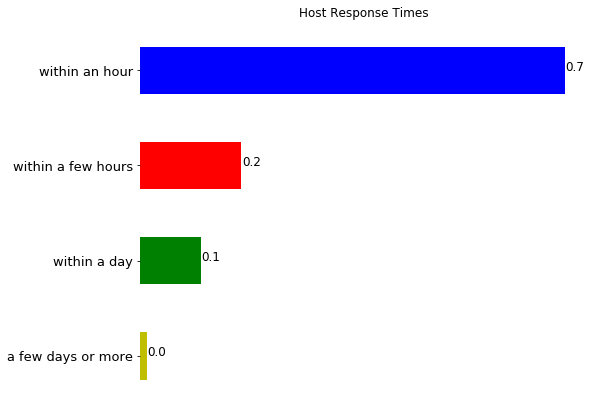

In [32]:
host_response_vals = dfl['host_response_time'].value_counts()
ax=(host_response_vals/dfl.shape[0]).plot(kind="barh", color = ['b', 'r', 'g', 'y'], figsize = (8,7), fontsize = 13);
plt.title("Host Response Times");
totals=[]
for i in ax.patches:
    totals.append(i.get_width())

total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+0.0005, i.get_y()+.25, \
            str(round((i.get_width()/total), 1)), fontsize=12,
color='black')

ax.invert_yaxis()
ax.set_xticks([])
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)

# ref: https://stackoverflow.com/questions/925024/how-can-i-remove-the-top-and-right-axis-in-matplotlib

##### Note
We have used Edward Tufte principle and have tried to remove as much chart junk as possible, this simple plot gives the necessary infomration needed for the analysis of the response time.

##### Results
It can be seen that approximately 70% of the hosts in metro vancouver respond with in an hour

ref: https://stackoverflow.com/questions/925024/how-can-i-remove-the-top-and-right-axis-in-matplotlib

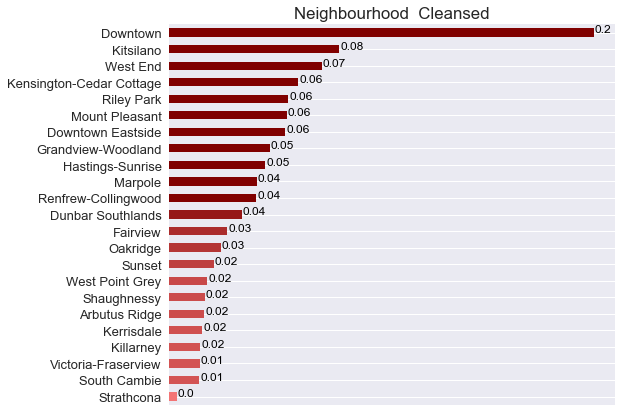

In [33]:
sns.set(font_scale=1.4)

data_normalizer = mp.colors.Normalize()
color_map = mp.colors.LinearSegmentedColormap(
    "my_map",
    {
        "red": [(0, 1.0, 1.0),
                (1.0, .5, .5)],
        "green": [(0, 0.5, 0.5),
                  (1.0, 0, 0)],
        "blue": [(0, 0.50, 0.5),
                 (1.0, 0, 0)]
    }
)

# ref: https://www.pythonprogramming.in/bar-chart-with-different-color-of-bars.html
# Explore Categorical Feature - neighborhood_group_cleansed

neigh_vals = dfl['neighbourhood_cleansed'].value_counts()
ax2=(neigh_vals/dfl.shape[0]).plot(kind="barh", figsize = (8,7), fontsize = 13, color = color_map(neigh_vals));
plt.title("Neighbourhood  Cleansed");
totals=[]
for i in ax2.patches:
    totals.append(i.get_width())

total = sum(totals)

# set individual bar lables using above list
for i in ax2.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax2.text(i.get_width()+0.0005, i.get_y()+.25, \
            str(round((i.get_width()/total), 2)), fontsize=12,
color='black')

ax2.invert_yaxis()
ax2.set_xticks([])
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['top'].set_visible(False)

We have used the gradient color in the chart to show the variance in the values.

ref: https://robertmitchellv.com/blog-bar-chart-annotations-pandas-mpl.html

ref: https://www.pythonprogramming.in/bar-chart-with-different-color-of-bars.html

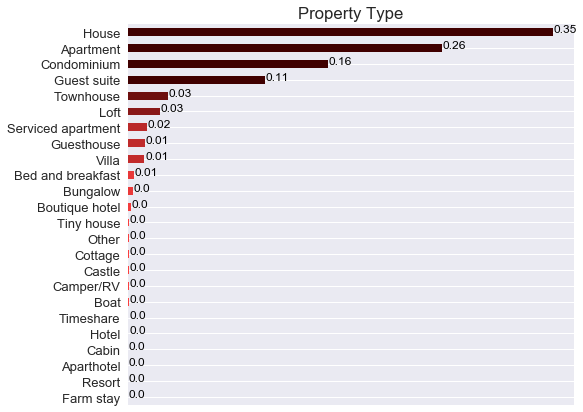

In [34]:
prop_vals = dfl['property_type'].value_counts()
data_normalizer = mp.colors.Normalize()
color_map = mp.colors.LinearSegmentedColormap(
    "my_map",
    {
        
        "green": [(0, 0.25, 0.25),
                  (1.0, 0, 0)],
        "red": [(0, 1.0, 1.0),
                (1.0, .25, .25)],
        "blue": [(0, 0.250, 0.25),
                 (1.0, 0, 0)]
    }
)
ax2=(prop_vals/dfl.shape[0]).plot(kind="barh", figsize = (8,7), fontsize = 13, color = color_map(prop_vals));
plt.title("Property Type");
totals=[]
for i in ax2.patches:
    totals.append(i.get_width())

total = sum(totals)

# set individual bar lables using above list
for i in ax2.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax2.text(i.get_width()+0.0005, i.get_y()+.25, \
            str(round((i.get_width()/total), 2)), fontsize=12,
color='black')

ax2.invert_yaxis()
ax2.set_xticks([])
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['top'].set_visible(False)

##### Results

Approximately 35% of the properties listed on Vancouver Air bnb are houses and 26% are apartments

### Question 1 - Price correlations
1. Understand the correlation between price and the season of the year, and detect the peak season in Vancouver
2. To get an understanding of price correlation with the neighbourhoods in vancouver
3. Getting an insight into the relationship between the listed pricing and the property type in metro vancovuer

In [35]:
dfc['year'] = pd.DatetimeIndex(dfc['date']).year
dfc['month'] = pd.DatetimeIndex(dfc['date']).month

We will remove the $ symbol 

ref:https://stackoverflow.com/questions/22588316/pandas-applying-regex-to-replace-values

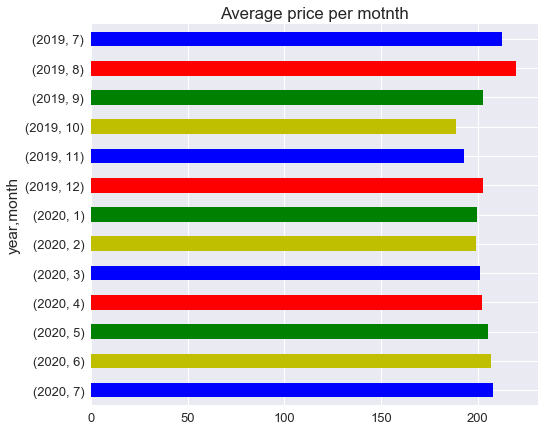

In [36]:

dfc['price'] = dfc['price'].replace('[\$,]', '', regex=True).astype(float)
m2=dfc.groupby(['year','month'])[['price']].mean()
ax3=m2.plot(kind="barh", figsize = (8,7), fontsize = 13, color = ['b', 'r', 'g', 'y']);
plt.title("Average price per motnth");

ax3.invert_yaxis()
ax3.legend().set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['bottom'].set_visible(False)
ax3.spines['left'].set_visible(False)
ax3.spines['top'].set_visible(False)

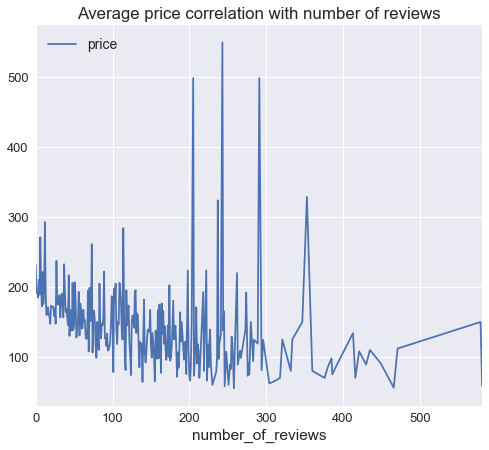

In [37]:
dfl['price'] = dfl['price'].replace('[\$,]', '', regex=True).astype(float)
m2=dfl.groupby(['number_of_reviews'])[['price']].mean()
ax3=m2.plot( figsize = (8,7), fontsize = 13, label = 'price in $');
plt.title("Average price correlation with number of reviews");

#ax3.invert_yaxis()
ax3.legend(loc='upper left')
ax3.spines['right'].set_visible(False)
ax3.spines['bottom'].set_visible(False)
ax3.spines['left'].set_visible(False)
ax3.spines['top'].set_visible(False)

##### Results

As we can see that listing price is higher for the number of reviews between 200-300, as the number of reviews increase we can see that price drops, which suggests that more customer tend to review places which are economical, however places with 200-300 tend to have higher listing price. 

Now we look at the neighbourhood and their pricings



                               price
neighbourhood_cleansed              
Downtown                  244.745082
West Point Grey           244.324324
Shaughnessy               228.576923
West End                  227.586364
Kerrisdale                216.092784
Kitsilano                 200.404082
Downtown Eastside         194.371257
Dunbar Southlands         194.176190
Arbutus Ridge             192.009709
South Cambie              168.306818
Fairview                  167.428571
Mount Pleasant            165.088496
Marpole                   161.474308
Sunset                    158.623077
Riley Park                152.131195
Kensington-Cedar Cottage  146.948925
Grandview-Woodland        145.027586
Oakridge                  143.853333
Strathcona                140.583333
Victoria-Fraserview       124.764045
Hastings-Sunrise          123.729242
Renfrew-Collingwood       122.448413
Killarney                 121.131868


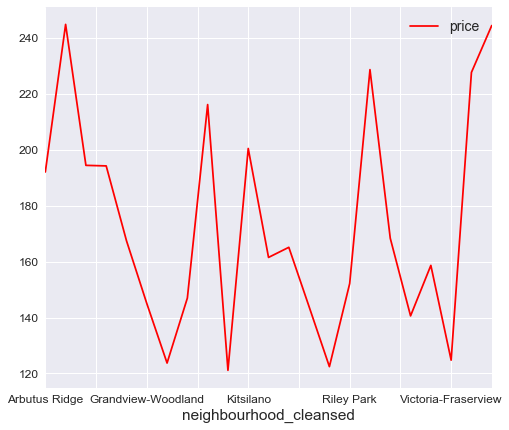

In [38]:
# sorting by price
print(dfl.groupby(['neighbourhood_cleansed'])[['price']].mean().sort_values(by='price',ascending=False))
dfl.groupby(['neighbourhood_cleansed'])[['price']].mean().plot(figsize = (8,7), fontsize = 12, color = 'red');

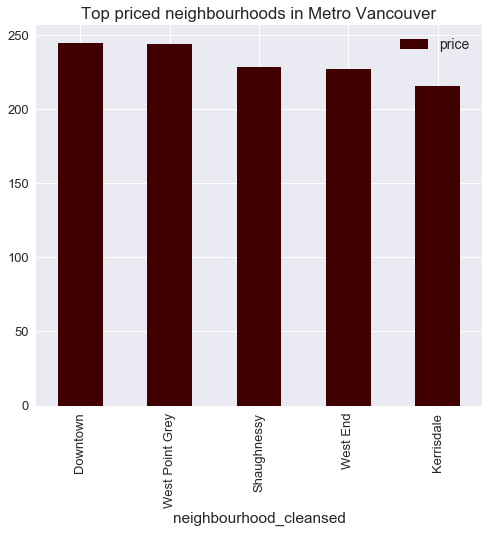

In [39]:
#Top prices 
mean = dfl['price'].mean()
top=dfl.groupby(['neighbourhood_cleansed'])[['price']].mean().sort_values(by = 'price', ascending = False).head();
top.plot(kind = 'bar', figsize = (8,7), fontsize = 13, color = color_map(dfl['price']))
plt.title("Top priced neighbourhoods in Metro Vancouver");

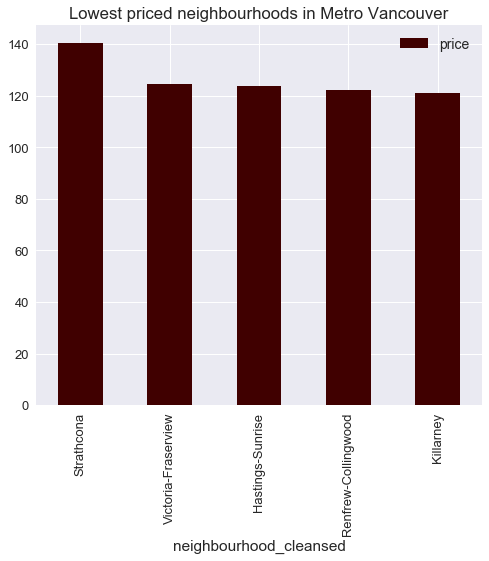

In [40]:
# Now we can also look at the cheapest neighbourhoods in vancouver
mean = dfl['price'].mean()
bot=dfl.groupby(['neighbourhood_cleansed'])[['price']].mean().sort_values(by = 'price', ascending = False).tail();
bot.plot(kind = 'bar', figsize = (8,7), fontsize = 13, color = color_map(dfl['price']))
plt.title("Lowest priced neighbourhoods in Metro Vancouver");

##### Resutls
It can be seen from the charts above that the highest average price listed per night is $250 and cheapest is $120 per night in metro Vancouver.

In [41]:
# Explore property types within neighborhoods and how they impact price
# Look at the top neighbourhoods and top property types

neigh = ('Downtown','Westpoint Grey','Shaughnessy','West End','Kerrisdale')
prop = ('Apartment','House')
dfl1 = dfl.loc[dfl['neighbourhood_cleansed'].isin(neigh)]
dfl2 = dfl1.loc[dfl['property_type'].isin(prop)]

dfnp = dfl2.groupby(['neighbourhood_cleansed','property_type'])[['price']].mean().reset_index()
dfnp

,neighbourhood_cleansed,property_type,price
0,Downtown,Apartment,250.253571
1,Downtown,House,416.000000
2,Kerrisdale,Apartment,203.363636
3,Kerrisdale,House,274.840000
4,Shaughnessy,Apartment,167.000000
5,Shaughnessy,House,296.540000
6,West End,Apartment,183.669065
7,West End,House,250.947368


In [42]:
price_arr = dfnp['price'].values
price_arr = np.reshape(price_arr, (4,2))
price_arr.shape

(4, 2)

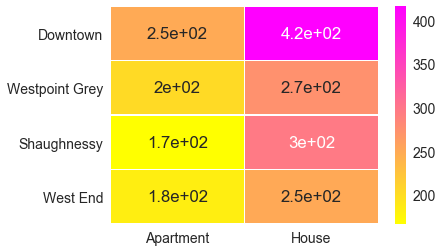

In [43]:

idx = ['Downtown','Westpoint Grey','Shaughnessy','West End']
cols = ['Apartment', 'House']
df = pd.DataFrame(price_arr, index=idx, columns=cols)

# _r reverses the normal order of the color map 'RdYlGn'
sns.heatmap(df, cmap='spring_r', linewidths=0.5, annot=True);

##### Results
It can be seen from the heatmap above that Houses in downtown Vancouver area have higher listing price than apartments. 

ref: https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

### Question 02 - Review correlation

- Understanding how reviews impact the occupancy rate
- Get a correlation of the reviews with the neighbourhoods in vancouver
- Can we explore some of the worst reviews for additional insights?

let us look at the data in the review and listing table and also calcualte the occupancy rate from the listing can calendar table

In [44]:
# we will now find the occupancy rate
dfo = pd.DataFrame(pd.pivot_table(dfc.groupby(['listing_id', 'available']).count()['date'].reset_index(),index=["listing_id"], columns='available', values='date').reset_index(), columns=['listing_id', 'f', 't']).fillna(0)
# Rename the column
dfo.columns = ['listing_id', 'occupied', 'available']

# finding the occupancy rate which is percentage
dfo['percentage'] = dfo['occupied'] / (dfo['available'] + dfo['occupied'])


# Now remove the unnecessary columns
dfo.drop(['available', 'occupied'], axis=1, inplace=True)
dfo.head()

,listing_id,percentage
0,10080,0.136986
1,13188,0.284932
2,13357,0.142466
3,13490,0.172603
4,14267,1.000000


Now that we have found the occupancy rate, we can see the correlation of the review scores with the occupancy rate. For that first we merge the listings data and the calendar data. 


In [45]:

data = dfl.merge(dfo, left_on='id', right_on='listing_id', how='inner')

Now we drop all the columns with 1 value

Review Score rating vs  Occupancy rate

Text(0,0.5,'Occupancy rate')

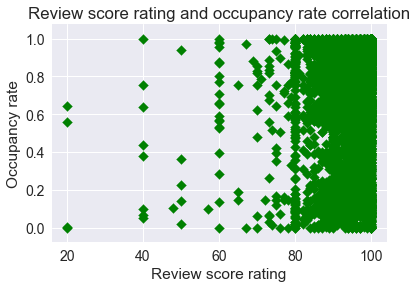

In [46]:
plt.scatter(data['review_scores_rating'], data['percentage'], color = 'green', marker = 'D')
plt.title('Review score rating and occupancy rate correlation')
plt.xlabel('Review score rating')
plt.ylabel('Occupancy rate')

Text(0,0.5,'occupancy rate')

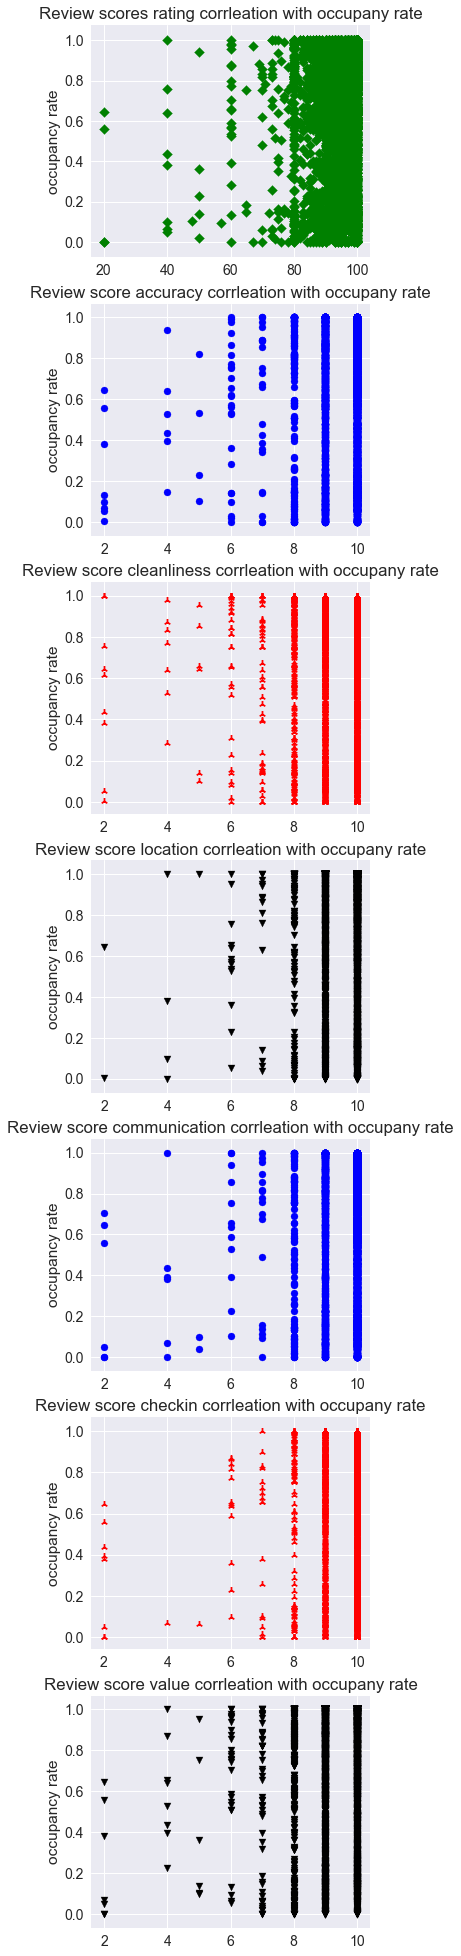

In [47]:
f, axs = plt.subplots(7,figsize=(5,35))
axs[0].scatter(data['review_scores_rating'], data['percentage'], color = 'green', marker = 'D')
axs[1].scatter(data['review_scores_accuracy'], data['percentage'], color = 'blue', marker = 'o')
axs[2].scatter(data['review_scores_cleanliness'], data['percentage'], color = 'red', marker = '2')
axs[3].scatter(data['review_scores_location'], data['percentage'], color = 'black', marker = 'v')
axs[4].scatter(data['review_scores_communication'], data['percentage'], color = 'blue', marker = 'o')
axs[5].scatter(data['review_scores_checkin'], data['percentage'], color = 'red', marker = '2')
axs[6].scatter(data['review_scores_value'], data['percentage'], color = 'black', marker = 'v')

axs[0].set_title('Review scores rating corrleation with occupany rate')
axs[1].set_title('Review score accuracy corrleation with occupany rate')
axs[2].set_title('Review score cleanliness corrleation with occupany rate')
axs[3].set_title('Review score location corrleation with occupany rate')
axs[4].set_title('Review score communication corrleation with occupany rate')
axs[5].set_title('Review score checkin corrleation with occupany rate')
axs[6].set_title('Review score value corrleation with occupany rate')

axs[0].set_ylabel('occupancy rate')
axs[1].set_ylabel('occupancy rate')
axs[2].set_ylabel('occupancy rate')
axs[3].set_ylabel('occupancy rate')
axs[4].set_ylabel('occupancy rate')
axs[5].set_ylabel('occupancy rate')
axs[6].set_ylabel('occupancy rate')





##### Results
Review rates are higher for properties with high occupancy rate. This could be either bad review or good review

ref: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.subplots.html

In [48]:
dfcom = dfr[['listing_id', 'comments']].copy()
dfcom.head()

,listing_id,comments
0,10080,this accommodation was excellent. beautiful sp...
1,10080,The host canceled my reservation 13 days befor...
2,10080,"This apartment is fantastic, just what I and m..."
3,10080,Very nice apartment and great view. Close to S...
4,10080,Both Rami and Mauricio made our family of 5 fe...


In [49]:
data2 = dfcom.merge(dfl, left_on='listing_id', right_on='id', how='inner')


Now we do the sentiment analysis, using the sentimentintensityanalyzer from NLTK library

In [50]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
anlzer = SentimentIntensityAnalyzer()

def sentiment_analyzer_scores(comm):
    '''
    Function runs sentiment analyzer on the provided comments and returns the total polarity score
    INPUT:
    comm - the text of the review comments 
    OUTPUT:
    result['compound'] - The combinition of positive, negative, and neutral score for a particular sentence for sentiment analysis. 
   
    '''
    comm = str(comm)
    result = anlzer.polarity_scores(comm)
    return result['compound']

data2['polarity_score'] = data2['comments'].apply(sentiment_analyzer_scores)
data2.head()


,listing_id,comments,id,listing_url,scrape_id,last_scraped,name,summary,space,description,...,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,polarity_score
0,10080,this accommodation was excellent. beautiful sp...,10080,https://www.airbnb.com/rooms/10080,20190710134459,2019-07-10,D1 - Million Dollar View 2 BR,"Stunning two bedroom, two bathroom apartment. ...","Bed setup: 2 x queen, option to add up to 2 tw...","Stunning two bedroom, two bathroom apartment. ...",...,f,strict_14_with_grace_period,f,f,36,36,0,0,0.17,0.9824
1,10080,The host canceled my reservation 13 days befor...,10080,https://www.airbnb.com/rooms/10080,20190710134459,2019-07-10,D1 - Million Dollar View 2 BR,"Stunning two bedroom, two bathroom apartment. ...","Bed setup: 2 x queen, option to add up to 2 tw...","Stunning two bedroom, two bathroom apartment. ...",...,f,strict_14_with_grace_period,f,f,36,36,0,0,0.17,0.0000
2,10080,"This apartment is fantastic, just what I and m...",10080,https://www.airbnb.com/rooms/10080,20190710134459,2019-07-10,D1 - Million Dollar View 2 BR,"Stunning two bedroom, two bathroom apartment. ...","Bed setup: 2 x queen, option to add up to 2 tw...","Stunning two bedroom, two bathroom apartment. ...",...,f,strict_14_with_grace_period,f,f,36,36,0,0,0.17,0.9595
3,10080,Very nice apartment and great view. Close to S...,10080,https://www.airbnb.com/rooms/10080,20190710134459,2019-07-10,D1 - Million Dollar View 2 BR,"Stunning two bedroom, two bathroom apartment. ...","Bed setup: 2 x queen, option to add up to 2 tw...","Stunning two bedroom, two bathroom apartment. ...",...,f,strict_14_with_grace_period,f,f,36,36,0,0,0.17,0.6997
4,10080,Both Rami and Mauricio made our family of 5 fe...,10080,https://www.airbnb.com/rooms/10080,20190710134459,2019-07-10,D1 - Million Dollar View 2 BR,"Stunning two bedroom, two bathroom apartment. ...","Bed setup: 2 x queen, option to add up to 2 tw...","Stunning two bedroom, two bathroom apartment. ...",...,f,strict_14_with_grace_period,f,f,36,36,0,0,0.17,0.9694


ref:https://stackoverflow.com/questions/39462021/nltk-sentiment-vader-polarity-scorestext-not-working

In [51]:
neigh_polarity = data2.groupby('neighbourhood_cleansed')[['polarity_score']].mean().sort_values(by='polarity_score',ascending=False)

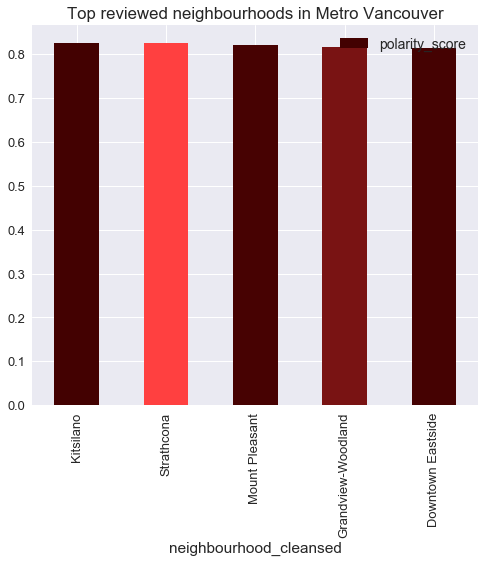

In [52]:
top2 = data2.groupby('neighbourhood_cleansed')[['polarity_score']].mean().sort_values(by='polarity_score',ascending=False).head()
bot2 = data2.groupby('neighbourhood_cleansed')[['polarity_score']].mean().sort_values(by='polarity_score',ascending=False).tail()

top2.plot(kind = 'bar', figsize = (8,7), fontsize = 13, color = color_map(data2['polarity_score']))
plt.title("Top reviewed neighbourhoods in Metro Vancouver");

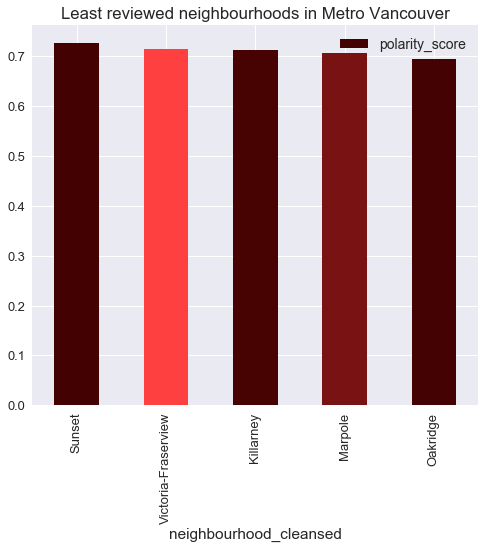

In [53]:
bot2.plot(kind = 'bar', figsize = (8,7), fontsize = 13, color = color_map(data2['polarity_score']))
plt.title("Least reviewed neighbourhoods in Metro Vancouver");

### Question # 03

Now we will look at the influence of parameters such as below on the availability rate 
- Cancellation policy
- Room type
- Number of guests
- Guests picture


First we try to clean the data and deal with the missing values, For bathrooms column, there are two missing values, but a property must have atleast 1 bathroom, so we will use 1 to fill the NA. We will also drop unnecessary columns




In [54]:
dfl2 = data.copy()

dfl2 = dfl2.drop(['id','listing_url','scrape_id','last_scraped','thumbnail_url','medium_url','xl_picture_url','host_id','host_url','host_thumbnail_url','host_verifications','street','neighbourhood','neighbourhood_group_cleansed','zipcode','smart_location','country','experiences_offered','market','jurisdiction_names','latitude','host_acceptance_rate', 'longitude','weekly_price','monthly_price','calendar_updated','calendar_last_scraped','first_review','last_review','calculated_host_listings_count','reviews_per_month', 'square_feet'], axis= 1)

In [18]:
dfl2.shape

(5975, 74)

In [55]:
dfl2.isnull().sum()

name                                               0
summary                                          161
space                                           1188
description                                       72
neighborhood_overview                           1594
notes                                           2922
transit                                         1606
access                                          2064
interaction                                     1860
house_rules                                     1552
picture_url                                        0
host_name                                          7
host_since                                         7
host_location                                     14
host_about                                      2270
host_response_time                               532
host_response_rate                               532
host_is_superhost                                  7
host_picture_url                              

In [56]:
dfl3 = dfl2.select_dtypes(include=['float', 'int'])

In [57]:
dfl3.isnull().sum()

host_listings_count              7
host_total_listings_count        7
bathrooms                        2
bedrooms                         4
beds                             5
price                            0
minimum_nights_avg_ntm           0
maximum_nights_avg_ntm           0
review_scores_rating           914
review_scores_accuracy         916
review_scores_cleanliness      915
review_scores_checkin          919
review_scores_communication    916
review_scores_location         918
review_scores_value            918
percentage                       0
dtype: int64

In [58]:
dfl2['bathrooms'] = dfl2['bathrooms'].fillna(1)


dfl2['bedrooms'] = dfl2['bedrooms'].fillna(1)


dfl2['beds'] = dfl2['beds'].fillna(1)
dfl2['host_listings_count'] = dfl2['host_listings_count'].fillna(1)
dfl2['host_total_listings_count'] = dfl2['host_total_listings_count'].fillna(1)

dfl2['review_scores_rating'] = dfl2['review_scores_rating'].fillna(0)

dfl2['review_scores_accuracy'] = dfl2['review_scores_accuracy'].fillna(0)

dfl2['review_scores_cleanliness'] = dfl2['review_scores_cleanliness'].fillna(0)

dfl2['review_scores_checkin'] = dfl2['review_scores_checkin'].fillna(0)

dfl2['review_scores_rating'] = dfl2['review_scores_rating'].fillna(0)
dfl2['review_scores_communication'] = dfl2['review_scores_communication'].fillna(0)
dfl2['review_scores_value'] = dfl2['review_scores_value'].fillna(0)
dfl2['review_scores_location'] = dfl2['review_scores_location'].fillna(0)

In [59]:
dfl3 = dfl2.select_dtypes(include=['float', 'int'])
dfl3.isnull().sum()

host_listings_count            0
host_total_listings_count      0
bathrooms                      0
bedrooms                       0
beds                           0
price                          0
minimum_nights_avg_ntm         0
maximum_nights_avg_ntm         0
review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
percentage                     0
dtype: int64

Now none of integer and float  type columns have missing values. 

In [60]:
dfl2.select_dtypes(include=['object']).columns

Index(['name', 'summary', 'space', 'description', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'picture_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_is_superhost',
       'host_picture_url', 'host_neighbourhood', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_cleansed', 'city', 'state',
       'country_code', 'is_location_exact', 'property_type', 'room_type',
       'bed_type', 'amenities', 'security_deposit', 'cleaning_fee',
       'extra_people', 'has_availability', 'requires_license', 'license',
       'instant_bookable', 'is_business_travel_ready', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification'],
      dtype='object')

In [61]:
dfl2['host_response_time'] = dfl2['host_response_time'].fillna('N/A')


dfl2['host_response_rate'] = dfl2['host_response_rate'].apply(lambda x: 0 if x == 'N/A' else x)
dfl2['host_response_rate'] = dfl2['host_response_rate'].replace('[\%,]', '', regex=True).astype(float)
dfl2['host_response_rate'] = dfl2['host_response_rate'].fillna(0)

# Drop record with empty value for property_type
dfl2 = dfl2.dropna(subset=['property_type'], axis=0)

# Removing $ symbol from all the fees
dfl2['security_deposit'] = dfl2['security_deposit'].replace('[\$,]', '', regex=True).astype(float)
dfl2['cleaning_fee'] = dfl2['cleaning_fee'].replace('[\$,]', '', regex=True).astype(float)
dfl2['extra_people'] = dfl2['extra_people'].replace('[\$,]', '', regex=True).astype(float)
dfl2['security_deposit'] = dfl2['security_deposit'].fillna(0)
dfl2['cleaning_fee'] = dfl2['cleaning_fee'].fillna(0)


#making, citites,state lower case for uniformity
dfl2['city'] = dfl2['city'].str.lower()
dfl2['city'] = dfl2['city'].str.strip()
dfl2['state'] = dfl2['state'].str.lower()

Now we will make xome box plots to visulaizecorrelation between parameters and the occupancy rate

In [62]:

top = dfl2[['property_type','require_guest_profile_picture', 'guests_included',   'cancellation_policy','room_type', 'percentage']]


Text(0.5,0.98,'Relationship of room type with occupancy rate')

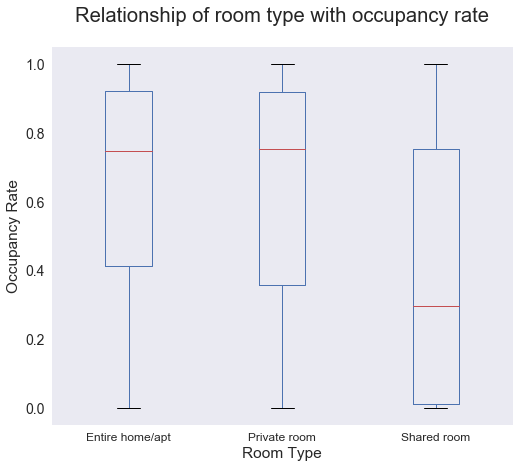

In [63]:
# Now we are going to make a box plot to see the relationship

boxplot1 = top.boxplot(column= 'percentage', by ='room_type', fontsize = 12, figsize = (8,7), grid = False)
boxplot1.set_xlabel('Room Type')
boxplot1.set_ylabel('Occupancy Rate')

boxplot1.get_figure().gca().set_title(" ")
boxplot1.get_figure().suptitle('Relationship of room type with occupancy rate')

In [64]:
top.groupby(['room_type'])[['percentage']].mean().sort_values(by = 'percentage', ascending = False)

,percentage
room_type,
Entire home/apt,0.650530
Private room,0.636747
Shared room,0.410218


##### Results
As we can see that entire homes, and private rooms are more popular than shared rooms and have very low availability. This is evident from the calcualted average above. 

Text(0.5,0.98,'Relationship of property type with occupancy rate')

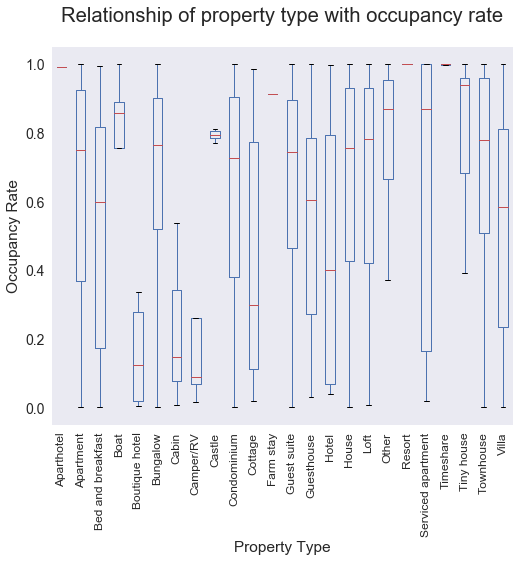

In [65]:
boxplot2 = top.boxplot(column= 'percentage', by ='property_type', fontsize = 12, figsize = (8,7), grid = False,  rot=90)
boxplot2.set_xlabel('Property Type')
boxplot2.set_ylabel('Occupancy Rate')

boxplot2.get_figure().gca().set_title(" ")
boxplot2.get_figure().suptitle('Relationship of property type with occupancy rate')

##### Results

Botique hotels are the least occupied property in metro vancouver

In [66]:
top.groupby(['property_type'])[['percentage']].mean().sort_values(by = 'percentage', ascending = False)

,percentage
property_type,
Resort,1.000000
Timeshare,0.998630
Aparthotel,0.991781
Farm stay,0.912329
Boat,0.802192
Castle,0.792329
Tiny house,0.779795
Other,0.774658
Townhouse,0.699698


Text(0.5,0.98,'Relationship of cancellation policy with occupancy rate')

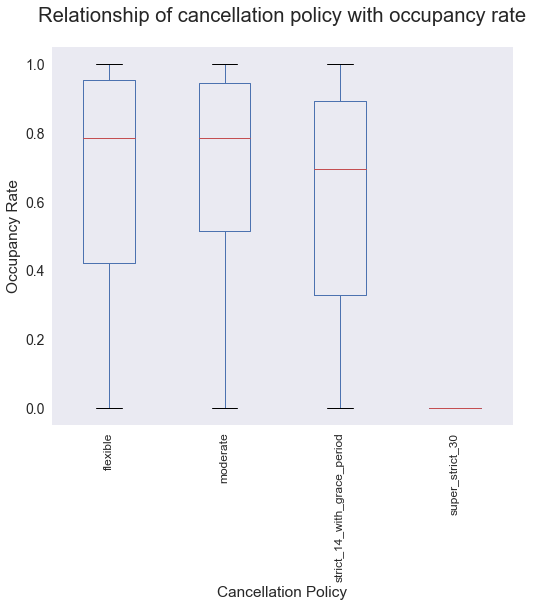

In [67]:
boxplot3 = top.boxplot(column= 'percentage', by ='cancellation_policy', fontsize = 12, figsize = (8,7), grid = False,  rot=90)
boxplot3.set_xlabel('Cancellation Policy')
boxplot3.set_ylabel('Occupancy Rate')

boxplot3.get_figure().gca().set_title(" ")
boxplot3.get_figure().suptitle('Relationship of cancellation policy with occupancy rate')

In [68]:
top.groupby(['cancellation_policy'])[['percentage']].mean().sort_values(by = 'percentage', ascending = False)

,percentage
cancellation_policy,
moderate,0.695356
flexible,0.666213
strict_14_with_grace_period,0.614464
super_strict_30,0.000000


##### Results

Above results suggest that, properties with more moderate to flexible cancellation policy tend to have more demand and higher occupancy, whereas properties with more strict cancellation policy have more availability. This suggests that for higher profits, businesses should move towards more relaxed cancellation policy

Text(0.5,0.98,'Relationship of number of guests with occupancy rate')

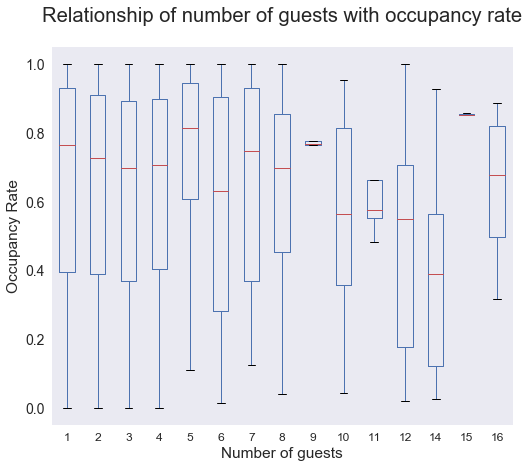

In [69]:
boxplot4 = top.boxplot(column= 'percentage', by ='guests_included', fontsize = 12, figsize = (8,7), grid = False)
boxplot4.set_xlabel('Number of guests')
boxplot4.set_ylabel('Occupancy Rate')

boxplot4.get_figure().gca().set_title(" ")
boxplot4.get_figure().suptitle('Relationship of number of guests with occupancy rate')

In [70]:
top.groupby(['guests_included'])[['percentage']].mean().sort_values(by = 'percentage', ascending = False)

,percentage
guests_included,
15,0.860665
5,0.708476
9,0.705205
1,0.653536
7,0.651689
11,0.639726
16,0.639726
2,0.638048
4,0.635192


##### Results

Listings which can host from families upto a small group are high in demand

Text(0.5,0.98,'Relationship of guest profile photo with occupancy rate')

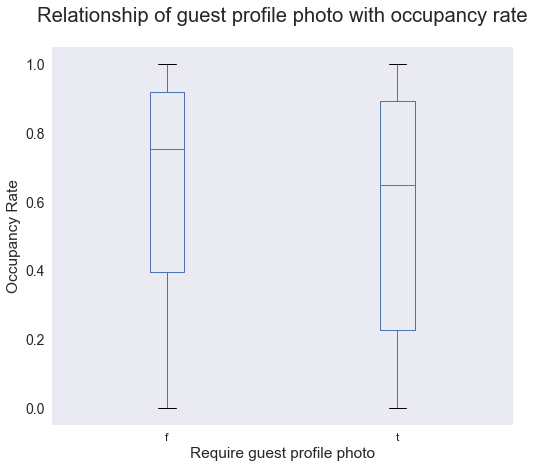

In [71]:
boxplot5 = top.boxplot(column= 'percentage', by ='require_guest_profile_picture', fontsize = 12, figsize = (8,7), grid = False)
boxplot5.set_xlabel('Require guest profile photo')
boxplot5.set_ylabel('Occupancy Rate')

boxplot5.get_figure().gca().set_title(" ")
boxplot5.get_figure().suptitle('Relationship of guest profile photo with occupancy rate')

In [72]:
top.groupby(['require_guest_profile_picture'])[['percentage']].mean().sort_values(by = 'percentage', ascending = False)

,percentage
require_guest_profile_picture,
f,0.646238
t,0.560999


##### Results
Properties that donot require guests profile photo for booking  has low availability and are more popular